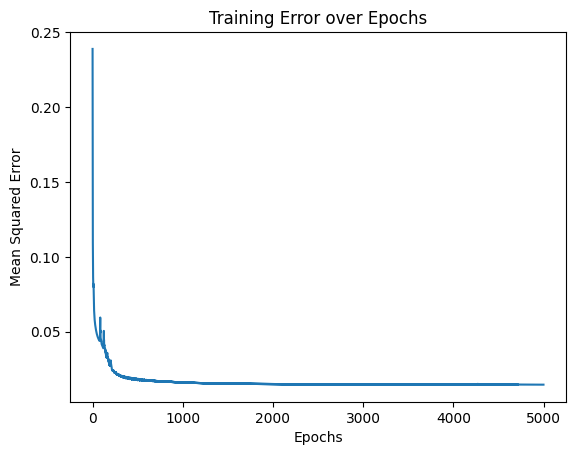

Training Accuracy: 97.40%


In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("classification_data.csv")
X = df[["Feature1", "Feature2"]].values
y = df["Class"].values

num_classes = len(np.unique(y))
Y = np.zeros((y.size, num_classes))
Y[np.arange(y.size), y] = 1

class NeuralNetwork:
    def __init__(self):
        inputLayerNeurons = X.shape[1]
        hiddenLayer1Neurons = 10
        hiddenLayer2Neurons = 8
        outLayerNeurons = num_classes

        self.learning_rate = 0.05


        self.W_H1 = np.random.randn(inputLayerNeurons, hiddenLayer1Neurons)
        self.W_H2 = np.random.randn(hiddenLayer1Neurons, hiddenLayer2Neurons)
        self.W_O = np.random.randn(hiddenLayer2Neurons, outLayerNeurons)

    def sigmoid(self, x, der=False):
        if der:
            return x * (1 - x)
        return 1 / (1 + np.exp(-x))

    def feedForward(self, X):
        self.hidden_output1 = self.sigmoid(np.dot(X, self.W_H1))
        self.hidden_output2 = self.sigmoid(np.dot(self.hidden_output1, self.W_H2))
        output = self.sigmoid(np.dot(self.hidden_output2, self.W_O))
        return output

    def backPropagation(self, X, Y, pred):
        output_error = Y - pred
        output_delta = output_error * self.sigmoid(pred, der=True)

        hidden_error2 = np.dot(output_delta, self.W_O.T)
        hidden_delta2 = hidden_error2 * self.sigmoid(self.hidden_output2, der=True)

        hidden_error1 = np.dot(hidden_delta2, self.W_H2.T)
        hidden_delta1 = hidden_error1 * self.sigmoid(self.hidden_output1, der=True)


        self.W_O += self.learning_rate * np.dot(self.hidden_output2.T, output_delta)
        self.W_H2 += self.learning_rate * np.dot(self.hidden_output1.T, hidden_delta2)
        self.W_H1 += self.learning_rate * np.dot(X.T, hidden_delta1)

    def train(self, X, Y):
        output = self.feedForward(X)
        self.backPropagation(X, Y, output)

NN = NeuralNetwork()
err = []

for i in range(5000):
    NN.train(X, Y)
    err.append(np.mean(np.square(Y - NN.feedForward(X))))


plt.plot(err)
plt.title("Training Error over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error")
plt.show()

preds = NN.feedForward(X)
predicted_classes = np.argmax(preds, axis=1)
accuracy = np.mean(predicted_classes == y)
print(f"Training Accuracy: {accuracy*100:.2f}%")
